# Lab 2. Exploring the data distribution

### Intro and objectives
#### review measures of location and variability
### review methods to explore the distribution of data

### something on this

### In this lab you will learn:



## 0. Let's import required libraries and load some data


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [2]:
covidDataFrame = pd.read_csv('../data/covid19_cases.csv',parse_dates=['dateRep'])

In [3]:
covidDataFrame.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


### 1. Estimates of Location
#### Variables with measured or count data might have thousands of distinct values. A basic step in exploring your data is getting a “typical value” for each feature (variable): an estimate of where most of the data is located (i.e., its central tendency).

### 1.1. Mean (a.k.a Average)
#### The Mean is simly the sum of all values divided by the number of values

#### there are several alternatives to compute the mean of a variable in Python: 
1. use the numpy module
2. use the pandas module


In [4]:
covidDataFrame['cases'].mean()

698.5782972688595

In [6]:
np.mean(covidDataFrame['cases'])

698.5782972688595

### 1.2. Trimmed Mean

#### A variation of the mean is a trimmed mean, which you calculate by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. Representing the sorted values by x(1),x(2),...,x(n) where x(1) is the smallest value and x(n) the largest, the formula to compute the trimmed mean with p smallest and largest values omitted is:

#### A trimmed mean eliminates the influence of extreme values. For example, in international diving the top and bottom scores from five judges are dropped, and the final score is the average of the three remaining judges. This makes it difficult for a single judge to manipulate the score, perhaps to favor his country’s contestant. Trimmed means are widely used, and in many cases, are preferable to use instead of the ordinary mean

In [14]:
# Trim off the 20% most extreme scores (lowest and highest)
stats.trim_mean(covidDataFrame['cases'], proportiontocut=0.1)

89.41374085086916

### 1.3. Median

#### The median is the middle number on a sorted list of the data. If there is an even number of data values, the middle value is one that is not actually in the data set, but rather the average of the two values that divide the sorted data into upper and lower halves. Compared to the mean, which uses all observations, the median depends only on the values in the center of the sorted data. While this might seem to be a disadvantage, since the mean is much more sensitive to the data, there are many instances in which the median is a better metric for location. 

#### The median is referred to as a robust estimate of location since it is not influenced by outliers (extreme cases) that could skew the results. An outlier is any value that is very distant from the other values in a data set. The exact definition of an outlier is somewhat subjective, although certain conventions are used in various data summaries and plots.

#### Being an outlier in itself does not make a data value invalid or erroneous . Still, outliers are often the result of data errors such as mixing data of different units (kilometers versus meters) or bad readings from a sensor.

In [8]:
covidDataFrame['cases'].median()

9.0

In [17]:
np.median(covidDataFrame['cases'])

9.0

### 2. Estimates of Variability
#### Location is just one dimension in summarizing a feature. A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

### 2.1. Standard Deviation and Related Estimates
#### The most widely used estimates of variation are based on the differences, or deviations, between the estimate of location and the observed data. For a set of data {1, 4, 4}, the mean is 3 and the median is 4. The deviations from the mean are the differences: 1 – 3 = –2, 4 – 3 = 1 , 4 – 3 = 1. These deviations tell us how dispersed the data is around the central value.

#### The best-known estimates for variability are the variance and the standard deviation, which are based on squared deviations. The variance is an average of the squared deviations, and the standard deviation is the square root of the variance.


#### there are several alternatives to compute the variance and standard deviation of a variable in Python: 
1. use the numpy module
2. use the pandas module


In [25]:
covidDataFrame['cases'].var()

18942995.121199723

In [27]:
np.var(covidDataFrame['cases'])

18942561.821526334

In [28]:
covidDataFrame['cases'].std()

4352.3551235164305

In [30]:
np.std(covidDataFrame['cases'])

4352.305345621598

### 2.2. Percentiles
#### A different approach to estimating dispersion is based on looking at the spread of the sorted data. Statistics based on sorted (ranked) data are referred to as order statistics. The most basic measure is the range: the difference between the largest and smallest number. The range, however, is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data.

#### To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end. Formally, these types of estimates are based on differences between percentiles. In a data set, the Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100 – P) percent of the values take on this value or more. For example, to find the 80th percentile, sort the data. Then, starting with the smallest value, proceed 80 percent of the way to the largest value. Note that the median is the same thing as the 50th percentile. The percentile is essentially the same as a quantile, with quantiles indexed by fractions (so the .8 quantile is the same as the 80th percentile).

#### there are several alternatives to compute percentiles of a variable in Python: 
1. use the numpy module
2. use the pandas module

In [32]:
### compute the 80% percentile
covidDataFrame['cases'].quantile(0.8)

262.0

In [34]:
### compute the 80% percentile
np.quantile(covidDataFrame['cases'],0.8)

262.0

### 3. Skewness and Kurtosis
#### A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.
#### Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

#### Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails. Data sets with low kurtosis tend to have light tails.

In [35]:
covidDataFrame['cases'].skew()

12.440644089924893

In [36]:
sp.stats.skew(covidDataFrame['cases'])

12.440217237278587

In [37]:
covidDataFrame['cases'].kurtosis()

183.35891066556854

In [38]:
sp.stats.kurtosis(covidDataFrame['cases'])

183.33780345440454

### 4. Exploring the Data Distribution
#### Each of the estimates we’ve covered sums up the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is distributed overall.



### 4.1. Frequency Table and Histograms
#### A frequency table of a variable divides up the variable range into equally spaced segments, and tells us how many values fall in each segment.

In [45]:
covidDataFrame['cases'].value_counts(bins=10)

(-8367.156, 2354.5]    41712
(2354.5, 12970.0]       1591
(12970.0, 23585.5]       111
(23585.5, 34201.0]        92
(44816.5, 55432.0]        65
(34201.0, 44816.5]        64
(55432.0, 66047.5]        40
(66047.5, 76663.0]        21
(87278.5, 97894.0]        12
(76663.0, 87278.5]        10
Name: cases, dtype: int64

#### A histogram is a way to visualize a frequency table, with bins on the x-axis and data count on the y-axis. 

<AxesSubplot:>

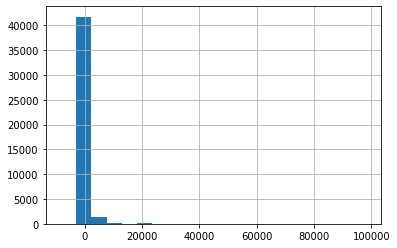

In [54]:
covidDataFrame['cases'].hist(bins=20)

<AxesSubplot:xlabel='cases', ylabel='Count'>

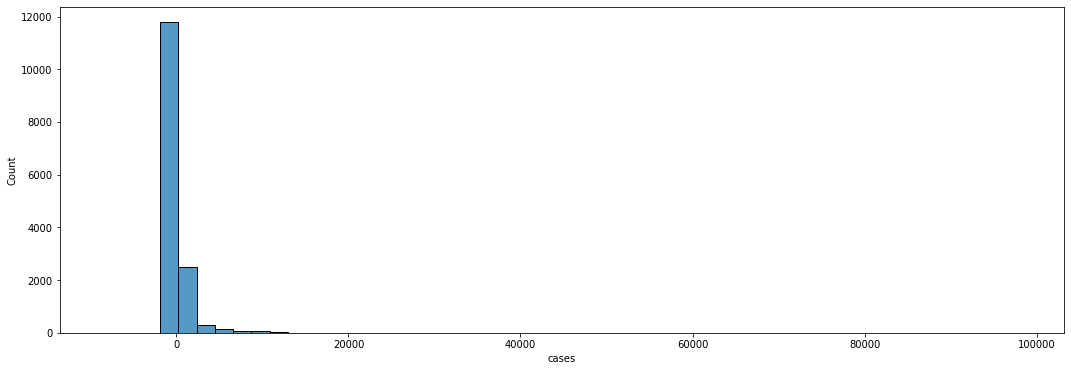

In [30]:
fig, ax= plt.subplots(figsize=(18, 6))
sns.histplot(data=covidDataFrame['cases'].sample(15000),bins=50)

### 4.2. Density Estimates
#### Related to the histogram is a density plot, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate 

<AxesSubplot:xlabel='cases', ylabel='Count'>

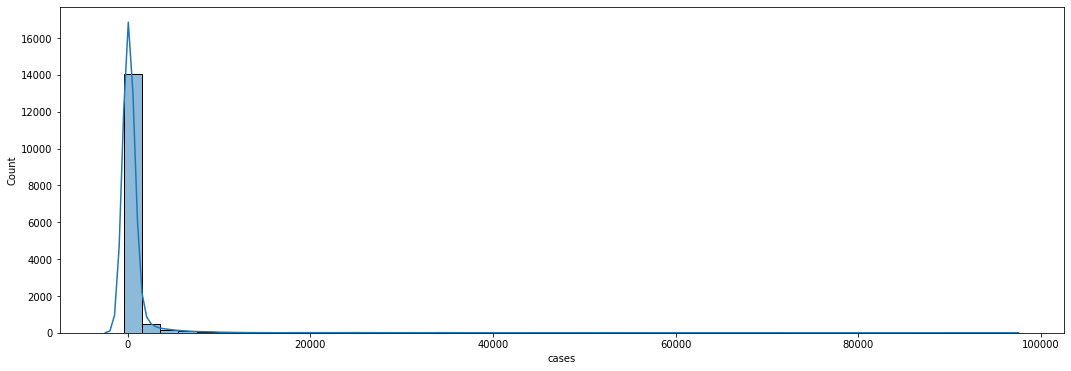

In [29]:
fig, ax= plt.subplots(figsize=(18, 6))
sns.histplot(data=covidDataFrame['cases'].sample(15000),bins=50,kde=True)

### 4.3. Box Plots
#### Boxplots, introduced by Tukey [Tukey-1977], are based on percentiles and give a quick way to visualize the distribution of data

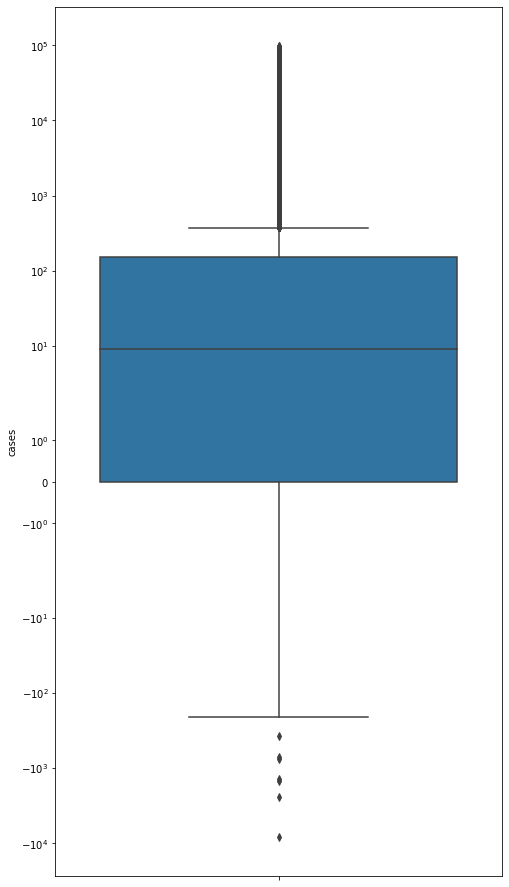

In [41]:
fig, ax= plt.subplots(figsize=(8, 16))
sns.boxplot(y=covidDataFrame['cases'])
ax.set_yscale('symlog')

### 4.4. Violin Plots
#### Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. 
#### A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data

<AxesSubplot:ylabel='cases'>

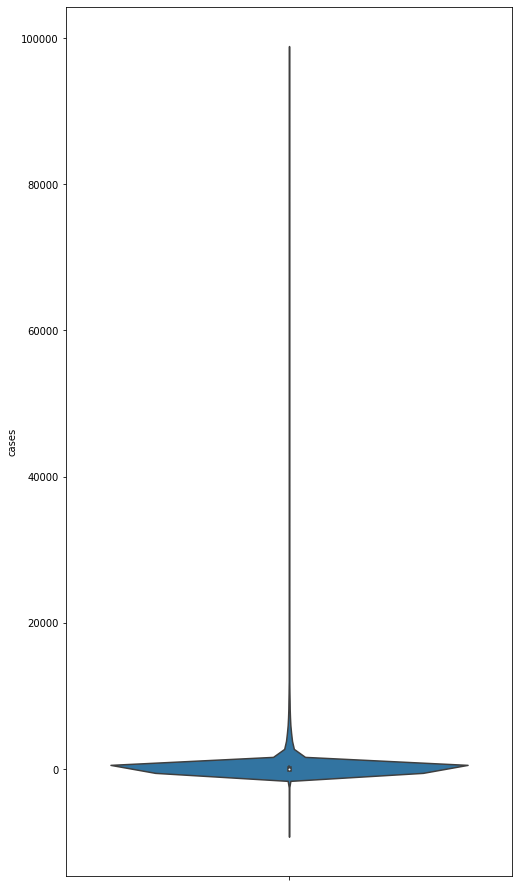

In [45]:
fig, ax= plt.subplots(figsize=(8, 16))
sns.violinplot(y=covidDataFrame['cases'])
